In [1]:
import geojsonio
import geopandas as gpd
import pandas as pd
import folium
%matplotlib inline
pd.options.display.max_rows = 10

In [2]:
ls crime_data_clean/

beats_filter_10_17.csv*      new/                        stadiums_final.csv*
crime_final_clean10_17.csv*  stadium_beats_geocode.csv*


In [3]:
selected_beats = ['1A10','10H30','10H50','10H60','10H80','15E40' ]

In [4]:
beats = gpd.read_file('geojson/HPB.geojson')


In [5]:
beats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
Area_sq_mi     118 non-null float64
Beats          118 non-null object
Beats_0        118 non-null object
District       118 non-null int64
OBJECTID       118 non-null int64
OBJECTID_1     118 non-null int64
OBJECTID_12    118 non-null int64
Perimet_mi     118 non-null float64
Shape_Leng     118 non-null float64
geometry       118 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 9.3+ KB


## Cleanup

In [6]:
beats.head()

,Area_sq_mi,Beats,Beats_0,District,OBJECTID,OBJECTID_1,OBJECTID_12,Perimet_mi,Shape_Leng,geometry
0,3.039335,23J40,23J40,23,104,1,1,9.254984,48866.313742,POLYGON ((-95.14071593648248 29.61495717899047...
1,2.123895,23J50,23J50,23,105,2,2,7.153639,37771.213441,(POLYGON ((-95.26673097093854 29.6573501829519...
2,1.746467,1A10,01A10,1,1,3,3,6.236709,32929.823999,POLYGON ((-95.35056999661641 29.76698019505118...
3,2.441331,1A20,01A20,1,2,4,4,7.953352,41993.697388,POLYGON ((-95.38079000465234 29.76227119357078...
4,2.659169,1A30,01A30,1,3,5,5,8.026355,42379.151925,POLYGON ((-95.40023701029395 29.75319219906543...


In [8]:
beats.columns

Index(['Area_sq_mi', 'Beats', 'Beats_0', 'District', 'OBJECTID', 'OBJECTID_1',
       'OBJECTID_12', 'Perimet_mi', 'Shape_Leng', 'geometry'],
      dtype='object')

In [9]:
df = beats[['Beats','geometry']]

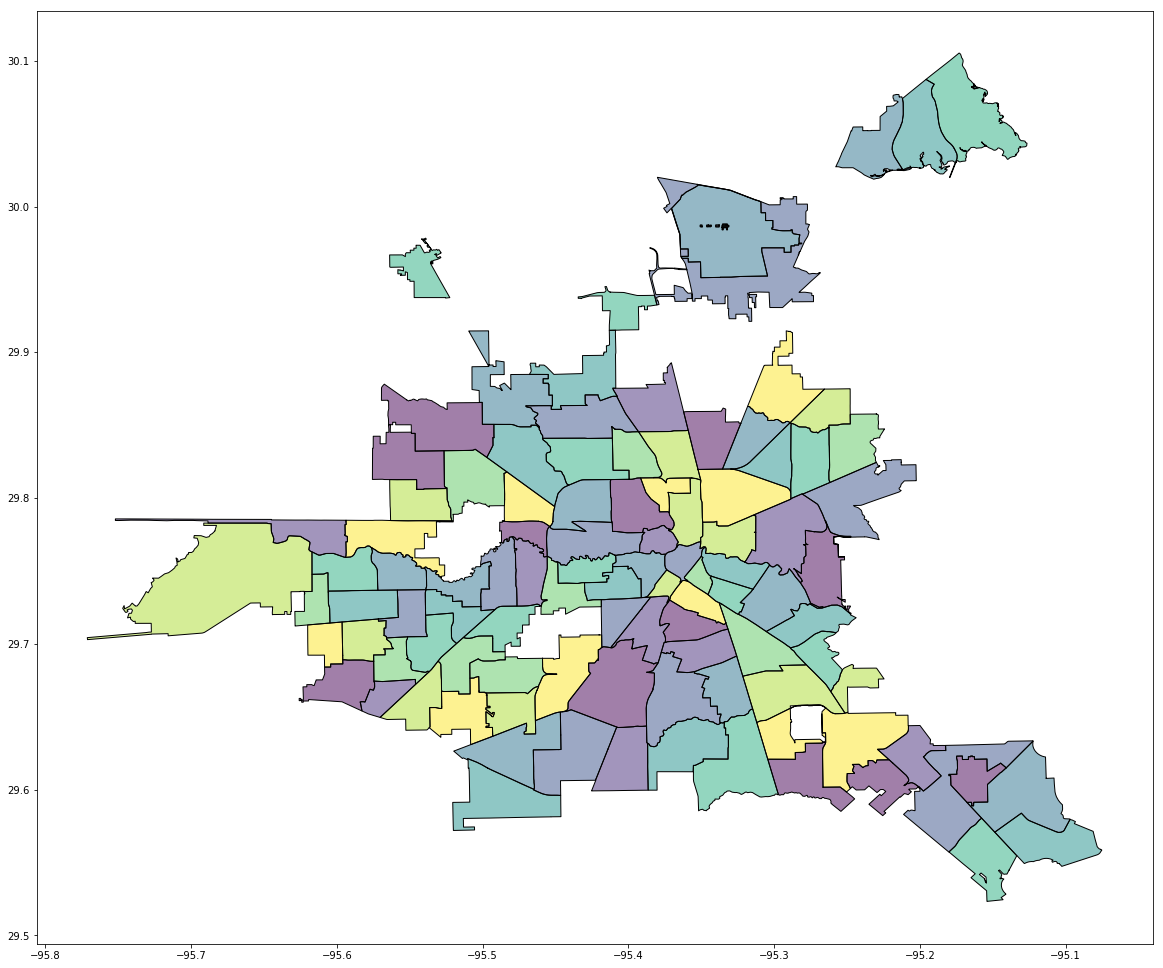

In [10]:
df.plot(figsize=(20,20))

In [11]:
selected_beats = ['1A10','10H30','10H50','10H60','10H80','15E40' ]

In [12]:
sel_df = df[df['Beats'].isin(selected_beats)]

In [13]:
sel_df

,Beats,geometry
2,1A10,POLYGON ((-95.35056999661641 29.76698019505118...
42,10H30,POLYGON ((-95.34289499568914 29.74638919856786...
44,10H50,POLYGON ((-95.35948290262172 29.74306939115621...
45,10H60,POLYGON ((-95.33311399078134 29.71456618629536...
47,10H80,POLYGON ((-95.41133100962757 29.69832918604841...
72,15E40,POLYGON ((-95.39751400695724 29.69697917975505...


83 data points its the limit

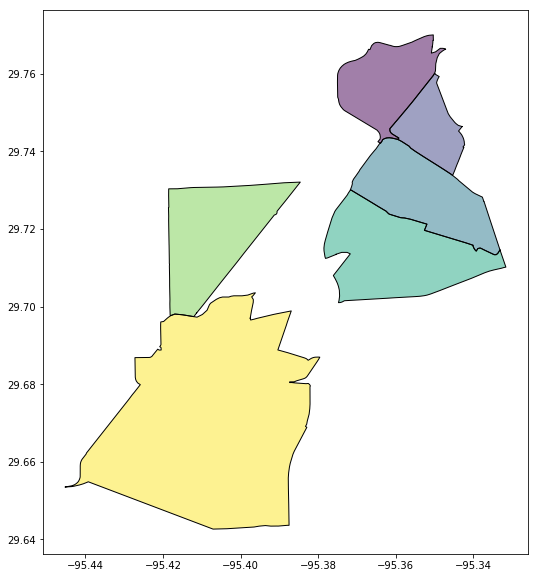

In [29]:
sel_df.plot(figsize=(15,10))

In [27]:
m = folium.Map([29.7604, -95.3698], zoom_start=11, tiles="OpenStreetMap")
folium.GeoJson(sel_df.to_json()).add_to(m)
m